In [ ]:
#importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [ ]:
df = pd.read_csv("/content/NATIONAL YOUTH SERVICE CORPS 5.csv")

In [ ]:
df.head(10)

,Timestamp,1. Year Batch Stream,2. Email,3. State of Deployment,4. Date of Registration,5. State of Origin,6. Age,7. Religion,8. Sex,9. Marital Status,...,39. Assess compliance with COVID - 19 safety protocols by the : [i. Vendors],40. Were corps members co-opted into Camp Committees,41. How effective was the Camp Committee in Registration,42. Assess the level of Corps Members' participation in the following camp activities:,43. How organized were the following? Please rate accordingly.,44 (B). How effective were the NYSC officials?\n,45. Assess Camp Discipline\nUse this question to answer items a to e,46. What extent has the orientation course made you amendable to National Service,47. What aspect of the orientation course programme did you find most interesting?,48. What suggestions would you give for improving the orientation course programme?
0,2023/07/21 4:00:25 PM GMT+1,2023 Batch “B” Stream I,adeniyies111@gmail.com,Ogun,2023-07-13,Oyo,23,Christianity,Male,Single,...,Very Good,Yes,5,5,5,5,5,3,SAED,It’s fine
1,2023/07/21 4:11:32 PM GMT+1,2023 Batch “B” Stream I,Morenikejiidowu74@gmail.com,Ogun,2023-07-13,Osun,24,Christianity,Female,Single,...,Good,Yes,1,1,1,1,1,2,Saed,More interesting lectures
2,2023/07/21 4:14:32 PM GMT+1,2023 Batch “B” Stream I,Kehindeyamah@gmail.com,Ogun,2023-07-12,Edo,23,Christianity,Female,Single,...,Very Good,No,1,1,1,1,1,1,Saed,The sleeping aspect
3,2023/07/21 4:15:50 PM GMT+1,2023 Batch “B” Stream I,ryanisiguzo@gmail.com,Ogun,2023-07-12,Imo,26,Christianity,Male,Single,...,Good,Yes,3,4,3,3,4,2,Social activities,"Improve the utilities, better running water,"
4,2023/07/21 4:29:28 PM GMT+1,2023 Batch “B” Stream I,ebunoluwaadeola3@gmail.com,Ogun,2023-06-26,Oyo,21,Christianity,Female,Single,...,Good,Yes,5,5,5,5,5,2,Social activity,Nil
5,2023/07/21 4:31:24 PM GMT+1,2023 Batch “B” Stream I,Salaudeentemitope222@gmail.com,Ogun,2023-07-12,Ogun,27,Islam,Female,Married,...,Good,No,5,4,3,3,4,3,All,At all
6,2023/07/21 4:38:23 PM GMT+1,2023 Batch “B” Stream I,Gcaps1000@gmail.com,Ogun,2023-07-17,Osun,27,Christianity,Male,Single,...,Good,Yes,3,3,3,3,3,2,None,"They shouldn't make it more than 2hrs, 5hrs is..."
7,2023/07/21 4:41:40 PM GMT+1,2023 Batch “B” Stream I,toluwanimi1112@gmail.com,Ogun,2023-07-12,Ekiti,25years,Christianity,Female,Single,...,Poor,Yes,2,2,2,2,4,2,Night out,The process of selection of student camp coord...
8,2023/07/21 4:43:26 PM GMT+1,2023 Batch “B” Stream I,duwenijoy@gmail.com,Ogun,2023-07-13,Delta,25,Christianity,Female,Divorced,...,Good,Yes,4,4,3,4,4,2,None,None
9,2023/07/21 4:44:57 PM GMT+1,2023 Batch “B” Stream I,jecysandra94@gmail.com,Ogun,2023-07-17,Anambra,28,Christianity,Female,Single,...,Good,Yes,5,5,5,5,5,3,Parade,Hostels should be renovated and kept clean. Ma...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 67 columns):
 #   Column                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                          --------------  ----- 
 0   Timestamp                                                                                                                                                       839 non-null    object
 1   1. Year Batch Stream                                                                                                                                            839 non-null    object
 2   2. Email                                                                                                                                  

In [ ]:
age_dict = {'27/11/1994': '29', '22/5/1997': '26', '15/2/2000 ': '23', '02/02/1994': '29','17/5/1998': '25', '22/04/1998': '25', '1995': '28', '1993 April 4': '30', 'July 19 1997': '26', '2': '25', '14': '25'}
df.replace({'6. Age' : age_dict}, inplace=True)

In [ ]:
df['6. Age'] =df['6. Age'].str.replace('([A-Za-z]+)', '')

<ipython-input-7-a6e79d140fb7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['6. Age'] =df['6. Age'].str.replace('([A-Za-z]+)', '')


In [ ]:
df['6. Age'] = df['6. Age'].astype(int)

In [ ]:
df['6. Age'].mean()

25.09892729439809

In [ ]:
df['6. Age'].value_counts()

25    138
23    136
24    123
26    106
27     86
28     77
22     71
29     52
21     25
30     15
20      7
31      1
33      1
45      1
Name: 6. Age, dtype: int64

In [ ]:
df['6. Age'] = pd.cut(df['6. Age'],bins=[20,25,30,35],labels=['21-25','26-30','31-35'])

In [ ]:
df.shape

(839, 67)

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.isna().sum())

Timestamp                                                                              0
1. Year Batch Stream                                                                   0
2. Email                                                                               0
3. State of Deployment                                                                 0
4.  Date of Registration                                                               0
                                                                                      ..
44 (B). How effective were the NYSC officials?\n                                       0
45. Assess Camp Discipline\nUse this question to answer items a to e                   0
46. What extent has the orientation course made you amendable to National Service      0
47.  What aspect of the orientation course programme did you find most interesting?    1
48. What suggestions would you give for improving the orientation course programme?    1
Length: 67, dtype: in

In [ ]:
df['4.  Date of Registration'].unique()

array(['2023-07-13', '2023-07-12', '2023-06-26', '2023-07-17',
       '1997-07-25', '2023-07-14', '1999-06-04', '1999-04-18',
       '1995-06-22', '2023-07-09', '1995-01-04', '1998-03-18',
       '2023-07-15', '0023-07-12', '2023-06-27', '2023-06-23',
       '1997-02-20', '1999-04-12', '1994-06-22', '2023-06-28',
       '2023-06-30', '2023-12-07', '1996-07-06', '2023-06-24',
       '2023-07-21', '2023-07-27', '1993-12-29', '2023-07-08',
       '1999-11-25', '1997-06-28', '2023-06-19', '1997-10-30',
       '2023-12-04', '1994-06-27', '2001-05-18', '2023-07-16',
       '1998-02-08', '2023-07-07', '2001-06-10', '2023-07-18',
       '2022-10-04', '1999-01-29', '1995-09-22', '1997-04-13',
       '1992-06-03', '1999-04-01', '2023-06-22', '1995-09-15',
       '2023-07-28', '1997-05-28', '1999-07-12', '1996-08-09',
       '1996-11-10', '2023-07-04', '2023-07-24', '2023-12-06',
       '2023-06-29', '1997-03-07', '1998-03-02', '1995-02-14',
       '1999-06-08', '1998-07-25', '1996-12-26', '1995-

In [ ]:
date_list = ['2023-07-13', '2023-07-12', '2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17']

In [ ]:
df['4.  Date of Registration'] = np.where(df['4.  Date of Registration'].isin(date_list),df['4.  Date of Registration'], '2023-07-12')

In [ ]:
df["13. Have you ever visited your state of deployment before National Service"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df["16.  Did you attend any briefing conducted by NYSC officials in your institution prior to mobilization? If No, state reasons."] =  np.where(df["16.  Did you attend any briefing conducted by NYSC officials in your institution prior to mobilization? If No, state reasons."].isin(['Yes']), df["16.  Did you attend any briefing conducted by NYSC officials in your institution prior to mobilization? If No, state reasons."], 'No')

In [ ]:
df['17. How do you feel about mobilization for National Service?'].unique()

array(['Eager', 'Indifferent', 'Reluctant'], dtype=object)

In [ ]:
random_seed = 42
np.random.seed(random_seed)
sample_size = 437


In [ ]:
df = df.sample(n=sample_size)

# ANALYSIS

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
grouped_counts = df['6. Age'].value_counts().sort_index().reset_index()
grouped_counts.columns = ['6. Age', 'Counts']
fig = px.pie(grouped_counts, names= '6. Age', values= 'Counts',
             labels = {'6. Age': 'Age Group', 'Counts': 'Frequency'})
fig.show()

In [ ]:
df['36. Was training on proper use of face mask and other safety protocol conducted in the camp?'] = df['36. Was training on proper use of face mask and other safety protocol conducted in the camp?'].fillna('No')

In [ ]:
df['37. How effective was the training?'].mode()

0    Effective
Name: 37. How effective was the training?, dtype: object

In [ ]:
df['37. How effective was the training?'] = df['37. How effective was the training?'].fillna('Effective')

In [ ]:
df["42. Assess the level of Corps Members' participation in the following camp activities:"].unique()

array([4, 2, 5, 3, 1])

In [ ]:
pie_list = ['7. Religion',
            '8. Sex',
            '9. Marital Status',
            '13. Have you ever visited your state of deployment before National Service',
            '16.  Did you attend any briefing conducted by NYSC officials in your institution prior to mobilization? If No, state reasons.',
            '17. How do you feel about mobilization for National Service?',
            '19. You must have registered Online for the NYSC. Did you collect your Call UP letter from school or you printed Online?',
            '20. Which of these two processes do you think is better?',
            '21. How was the registration on camp?',
            '22. How long did it take you to collect your kits?',
            '23. How can you describe the reception you were given on arrival at the camp?',
            '25. Were you satisfied with the kit items given to you?',
            '27. Were you given your right sizes?\n',
            '29. Was there a functional camp clinic',
            '30. How would you rate the performance of the clinic',
            '31. How do you rate the NYSC Safety Protocol on COVID - 19 In the camp?',
            '32. Was there enough hand washing / sanitizing bay in the camp?',
            '33. Was there availability of clean running water in the washing hand points?',
            '34.  How would you rate publicity and sensitization on COVID - 19 in the camp?',
            '35. Was the mandatory use of face masks enforced in the camp?',
            '36. Was training on proper use of face mask and other safety protocol conducted in the camp?',
            '37. How effective was the training?',
            '40. Were corps members co-opted into Camp Committees',]

In [ ]:
frequency = df['6. Age'].value_counts()
percentage = round(df['6. Age'].value_counts(normalize=True)*100, 2)

# Create a new dateframe with frequency and percentage
result = pd.DataFrame({'Frequency':frequency, 'Percentage (%)':percentage})
display('6. Age', HTML(result.to_html(index=True)))

'6. Age'

,Frequency,Percentage (%)
21-25,264,61.25
26-30,166,38.52
31-35,1,0.23


In [ ]:
#distribution table
for var in pie_list:
  frequency = df[var].value_counts()
  percentage = round(df[var].value_counts(normalize=True)*100, 2)

  # Create a new dateframe with frequency and percentage
  result = pd.DataFrame({'Frequency':frequency, 'Percentage (%)':percentage})
  display(var, HTML(result.to_html(index=True)))

'7. Religion'

,Frequency,Percentage (%)
Christianity,378,86.5
Islam,59,13.5


'8. Sex'

,Frequency,Percentage (%)
Female,253,57.89
Male,184,42.11


'9. Marital Status'

,Frequency,Percentage (%)
Single,413,94.51
Married,24,5.49


'13. Have you ever visited your state of deployment before National Service'

,Frequency,Percentage (%)
No,262,59.95
Yes,175,40.05


'16.  Did you attend any briefing conducted by NYSC officials in your institution prior to mobilization? If No, state reasons.'

,Frequency,Percentage (%)
No,234,53.55
Yes,203,46.45


'17. How do you feel about mobilization for National Service?'

,Frequency,Percentage (%)
Eager,335,76.66
Indifferent,92,21.05
Reluctant,10,2.29


'19. You must have registered Online for the NYSC. Did you collect your Call UP letter from school or you printed Online?'

,Frequency,Percentage (%)
Printed Online,436,99.77
Collected from school,1,0.23


'20. Which of these two processes do you think is better?'

,Frequency,Percentage (%)
Online Call Up letter,432,98.86
Call Up from school,5,1.14


'21. How was the registration on camp?'

,Frequency,Percentage (%)
Not stressful,259,59.27
Stressful,178,40.73


'22. How long did it take you to collect your kits?'

,Frequency,Percentage (%)
1 hour,241,55.15
More than 30 minutes but not up to 1 hour,113,25.86
30 minutes or less,83,18.99


'23. How can you describe the reception you were given on arrival at the camp?'

,Frequency,Percentage (%)
Friendly,416,95.19
Not friendly,21,4.81


'25. Were you satisfied with the kit items given to you?'

,Frequency,Percentage (%)
No,287,65.68
Yes,150,34.32


'27. Were you given your right sizes?\n'

,Frequency,Percentage (%)
No,348,79.63
Yes,89,20.37


'29. Was there a functional camp clinic'

,Frequency,Percentage (%)
Yes,431,98.63
No,6,1.37


'30. How would you rate the performance of the clinic'

,Frequency,Percentage (%)
Good,259,59.27
Very Good,172,39.36
poor,6,1.37


'31. How do you rate the NYSC Safety Protocol on COVID - 19 In the camp?'

,Frequency,Percentage (%)
Good,267,64.49
Very good,116,28.02
Poor,31,7.49


'32. Was there enough hand washing / sanitizing bay in the camp?'

,Frequency,Percentage (%)
Yes,267,65.76
No,139,34.24


'33. Was there availability of clean running water in the washing hand points?'

,Frequency,Percentage (%)
Yes,319,78.0
No,90,22.0


'34.  How would you rate publicity and sensitization on COVID - 19 in the camp?'

,Frequency,Percentage (%)
Good,272,67.00
Very Good,82,20.20
Poor,52,12.81


'35. Was the mandatory use of face masks enforced in the camp?'

,Frequency,Percentage (%)
No,290,70.9
Yes,119,29.1


'36. Was training on proper use of face mask and other safety protocol conducted in the camp?'

,Frequency,Percentage (%)
No,254,58.12
Yes,183,41.88


'37. How effective was the training?'

,Frequency,Percentage (%)
Effective,240,54.92
Very effective,124,28.38
Ineffective,73,16.70


'40. Were corps members co-opted into Camp Committees'

,Frequency,Percentage (%)
Yes,394,90.16
No,43,9.84


In [ ]:
for column in pie_list:
               counts = df[column].value_counts()
               percentages = round(df[column].value_counts(normalize=True) * 100, 2)
               summary_df = pd.DataFrame({'Categories': percentages.index, 'Percentages': percentages.values})
               fig = px.pie(summary_df, names='Categories', values='Percentages',
                            labels={'Percentages': 'Percentage (%)'})
               fig.show()

In [ ]:
df.columns

Index(['Timestamp', '1. Year Batch Stream', '2. Email',
       '3. State of Deployment', '4.  Date of Registration',
       '5. State of Origin', '6. Age', '7. Religion', '8. Sex',
       '9. Marital Status',
       '10. Institution of Graduation\nPlease write the name of your institution in full. No abbreviations.\nYour answer\n\n ',
       '11. Qualification',
       '12. Area of specialization\nPlease write your course of study in full. For instance: Medicine, Accounting, Elect - Elect Engineering, Philosophy, Zoology etc\n\n',
       '13. Have you ever visited your state of deployment before National Service',
       '14. If yes, in what capacity?',
       '15. Are you on concessional deployment? If Yes, state reasons.',
       '16.  Did you attend any briefing conducted by NYSC officials in your institution prior to mobilization? If No, state reasons.',
       '17. How do you feel about mobilization for National Service?',
       '18.  How do you rate the purpose for establishing 

In [ ]:
df.replace({'24.  What role did you play / contribute to the success of the orientation course?\nYour answer' : mapping_dict}, inplace=True)

In [ ]:
df['24.  What role did you play / contribute to the success of the orientation course?\nYour answer'].value_counts()[:10]

Parade                     33
No role                    13
Sports                     10
Sanitation                  7
I listened attentively      4
Band                        3
Social committee            3
Cultural dance              2
SAED                        2
Dancing                     2
Name: 24.  What role did you play / contribute to the success of the orientation course?\nYour answer, dtype: int64

In [ ]:
plot_top(10, '24.  What role did you play / contribute to the success of the orientation course?\nYour answer', 'Role Contribution to Orientation camp')

In [ ]:
df["42. Assess the level of Corps Members' participation in the following camp activities:"].value_counts()

5    246
4     97
3     55
2     20
1     19
Name: 42. Assess the level of Corps Members' participation in the following camp activities:, dtype: int64

In [ ]:
bar_list = ['4.  Date of Registration','5. State of Origin',
            '11. Qualification',
            '14. If yes, in what capacity?',
            '18.  How do you rate the purpose for establishing NYSC Scheme?',
            '41. How effective was the Camp Committee in Registration ',
            "42. Assess the level of Corps Members' participation in the following camp activities:",
            '43. How organized were the following? Please rate accordingly.',
            '44 (B). How effective were the NYSC officials?\n',
            '45. Assess Camp Discipline\nUse this question to answer items a to e',
            '46. What extent has the orientation course made you amendable to National Service']


In [ ]:
custom_titles = {'4.  Date of Registration': 'Date of Registration',
                 '5. State of Origin': 'State of Origin',
                 '11. Qualification':'Qualification',
            '14. If yes, in what capacity?': 'Reason for prior visit to state of deployment',
            '18.  How do you rate the purpose for establishing NYSC Scheme?': 'NYSC purpose Rating',
            '41. How effective was the Camp Committee in Registration ':'Effectiveness of Registration Committee',
            "42. Assess the level of Corps Members' participation in the following camp activities:":"Rating of Corps Members Participation in camp activities",
            '43. How organized were the following? Please rate accordingly.':'Level of Camp activities Organization',
            '44 (B). How effective were the NYSC officials?\n':'Effectiveness of NYSC Officials',
            '45. Assess Camp Discipline\nUse this question to answer items a to e':'Camp Discipline Assessment',
            '46. What extent has the orientation course made you amendable to National Service':'Orientation course effect on National Service'}

In [ ]:
for column in bar_list:
  counts = df[column].value_counts()
  fig = px.bar(counts, x=counts.index, y=counts.values, labels={'x': column, 'y':'Frequency'})

  if column in custom_titles:
    fig.update_layout(xaxis_title=custom_titles[column])
  fig.show()

In [ ]:
df['46. What extent has the orientation course made you amendable to National Service'].value_counts()

3    303
2    114
1     20
Name: 46. What extent has the orientation course made you amendable to National Service, dtype: int64

In [ ]:

top_list = ['10. Institution of Graduation\nPlease write the name of your institution in full. No abbreviations.\nYour answer\n\n ',
            '12. Area of specialization\nPlease write your course of study in full. For instance: Medicine, Accounting, Elect - Elect Engineering, Philosophy, Zoology etc\n\n',
            '15. Are you on concessional deployment? If Yes, state reasons.',
            '24.  What role did you play / contribute to the success of the orientation course?\nYour answer',
            '26. If No, state your reasons',
            '47.  What aspect of the orientation course programme did you find most interesting?',
            '48. What suggestions would you give for improving the orientation course programme?']

In [ ]:
df['10. Institution of Graduation\nPlease write the name of your institution in full. No abbreviations.\nYour answer\n\n '].value_counts()[:10]

Ekiti State University           11
University of Benin               8
Lagos state university            7
University of Benin               6
Ekiti state university            6
Federal University Oye-Ekiti      5
Kwara state polytechnic           4
Federal University Oye Ekiti      4
Federal polytechnic ilaro         4
Lagos State University            4
Name: 10. Institution of Graduation\nPlease write the name of your institution in full. No abbreviations.\nYour answer\n\n , dtype: int64

In [ ]:
#distribution table
for var in bar_list:
  frequency = df[var].value_counts()
  percentage = round(df[var].value_counts(normalize=True)*100, 2)

  # Create a new dateframe with frequency and percentage
  result = pd.DataFrame({'Frequency':frequency, 'Percentage (%)':percentage})
  display(var, HTML(result.to_html(index=True)))

'4.  Date of Registration'

,Frequency,Percentage (%)
2023-07-12,248,56.75
2023-07-13,142,32.49
2023-07-14,35,8.01
2023-07-15,6,1.37
2023-07-17,5,1.14
2023-07-16,1,0.23


'5. State of Origin'

,Frequency,Percentage (%)
Benue,45,10.30
Kwara,40,9.15
Oyo,36,8.24
Lagos,33,7.55
Osun,32,7.32
Edo,32,7.32
Ekiti,30,6.86
Delta,28,6.41
Anambra,26,5.95
Ondo,22,5.03


'11. Qualification'

,Frequency,Percentage (%)
B.SC,189,43.25
HND,152,34.78
B.ENG,29,6.64
B.ARTS,25,5.72
B.EDU,19,4.35
OTHER,10,2.29
M.B.B.S,5,1.14
B.PHARM,3,0.69
B.TECH,3,0.69
LLB,2,0.46


'14. If yes, in what capacity?'

,Frequency,Percentage (%)
Visitation,97,53.89
Living there now or had lived there before,36,20.00
Schooled there,31,17.22
Place of birth though not an indigene,6,3.33
An indigene of the state,6,3.33
Worked there before,4,2.22


'18.  How do you rate the purpose for establishing NYSC Scheme?'

,Frequency,Percentage (%)
High,261,59.73
Very High,162,37.07
Low,11,2.52
Very Low,3,0.69


'41. How effective was the Camp Committee in Registration '

,Frequency,Percentage (%)
5,216,49.43
4,93,21.28
3,79,18.08
1,33,7.55
2,16,3.66


"42. Assess the level of Corps Members' participation in the following camp activities:"

,Frequency,Percentage (%)
5,246,56.29
4,97,22.20
3,55,12.59
2,20,4.58
1,19,4.35


'43. How organized were the following? Please rate accordingly.'

,Frequency,Percentage (%)
5,207,47.37
4,119,27.23
3,72,16.48
1,23,5.26
2,16,3.66


'44 (B). How effective were the NYSC officials?\n'

,Frequency,Percentage (%)
5,253,57.89
4,96,21.97
3,54,12.36
1,20,4.58
2,14,3.20


'45. Assess Camp Discipline\nUse this question to answer items a to e'

,Frequency,Percentage (%)
5,240,54.92
4,109,24.94
3,46,10.53
1,26,5.95
2,16,3.66


'46. What extent has the orientation course made you amendable to National Service'

,Frequency,Percentage (%)
3,303,69.34
2,114,26.09
1,20,4.58


In [ ]:
df['28. How satisfied were you with the following? [a. Feeding Arrangement in general]'].value_counts()

Satisfied           210
Fairly Satisfied    113
Very Satisfied       98
Not Satisfied        16
Name: 28. How satisfied were you with the following? [a. Feeding Arrangement in general], dtype: int64

In [ ]:
joined_list = ['28. How satisfied were you with the following? [a. Feeding Arrangement in general]',
               '28. How satisfied were you with the following? [b. Quantity of food]',
                   '28. How satisfied were you with the following? [c. Quality of food]',
                   '28. How satisfied were you with the following? [d. Involvement of corps members in preparation of food]',
                   '28. How satisfied were you with the following? [e. Mode of serving food]']

In [ ]:
#distribution table
for var in joined_list:
  frequency = df[var].value_counts()
  percentage = round(df[var].value_counts(normalize=True)*100, 2)

  # Create a new dateframe with frequency and percentage
  result = pd.DataFrame({'Frequency':frequency, 'Percentage (%)':percentage})
  display(var, HTML(result.to_html(index=True)))

'28. How satisfied were you with the following? [a. Feeding Arrangement in general]'

,Frequency,Percentage (%)
Satisfied,210,48.05
Fairly Satisfied,113,25.86
Very Satisfied,98,22.43
Not Satisfied,16,3.66


'28. How satisfied were you with the following? [b. Quantity of food]'

,Frequency,Percentage (%)
Satisfied,191,43.71
Fairly Satisfied,151,34.55
Very Satisfied,58,13.27
Not Satisfied,37,8.47


'28. How satisfied were you with the following? [c. Quality of food]'

,Frequency,Percentage (%)
Satisfied,202,46.22
Fairly Satisfied,149,34.10
Very Satisfied,55,12.59
Not Satisfied,31,7.09


'28. How satisfied were you with the following? [d. Involvement of corps members in preparation of food]'

,Frequency,Percentage (%)
Satisfied,241,55.15
Very Satisfied,145,33.18
Fairly Satisfied,46,10.53
Not Satisfied,5,1.14


'28. How satisfied were you with the following? [e. Mode of serving food]'

,Frequency,Percentage (%)
Satisfied,228,52.17
Very Satisfied,107,24.49
Fairly Satisfied,84,19.22
Not Satisfied,18,4.12


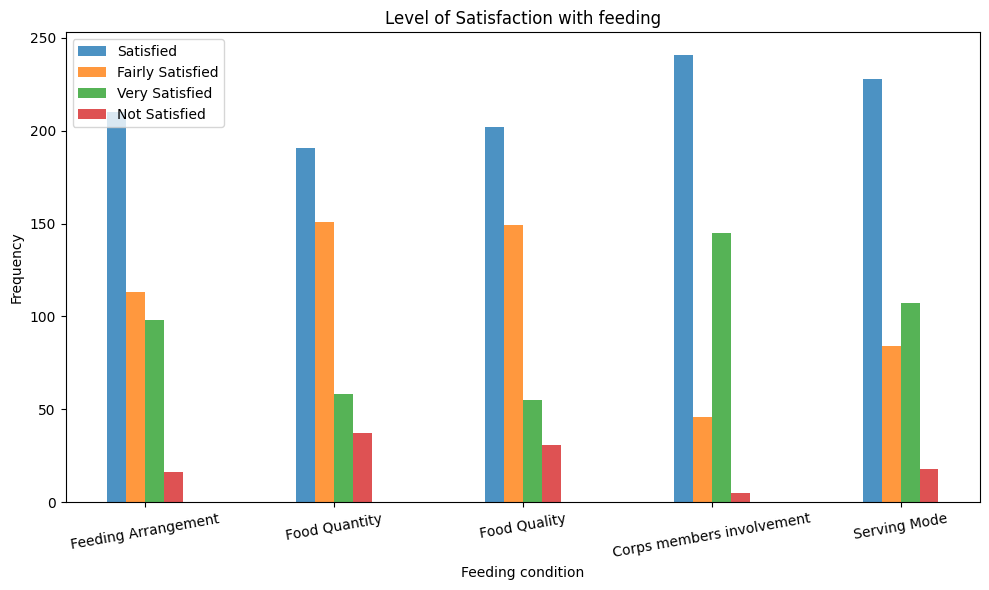

In [ ]:

categories = ['Satisfied', 'Fairly Satisfied', 'Very Satisfied', 'Not Satisfied']
columns_to_plot = ['28. How satisfied were you with the following? [a. Feeding Arrangement in general]',
                   '28. How satisfied were you with the following? [b. Quantity of food]',
                   '28. How satisfied were you with the following? [c. Quality of food]',
                   '28. How satisfied were you with the following? [d. Involvement of corps members in preparation of food]',
                   '28. How satisfied were you with the following? [e. Mode of serving food]']

# Create a DataFrame containing only the columns to plot
df_subset = df[columns_to_plot]


# Initialize an empty dictionary to store the counts for each category
category_counts = {cat: [] for cat in categories}

# Calculate the counts of each category in all categorical columns
for col in df_subset.columns:
    counts = df_subset[col].value_counts()
    for cat in categories:
        category_counts[cat].append(counts.get(cat, 0))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.1
x = np.arange(len(df_subset.columns))
bar_positions = [x + bar_width * i for i in range(len(categories))]

for i, cat in enumerate(categories):
    ax.bar(bar_positions[i], category_counts[cat], label=cat, width=bar_width, alpha=0.8)

ax.set_xticks(x + (len(categories) - 1) * bar_width / 2)
plt.xticks(rotation = 10)
ax.set_xticklabels(['Feeding Arrangement', 'Food Quantity', 'Food Quality', 'Corps members involvement', 'Serving Mode'])
ax.set_xlabel('Feeding condition')
ax.set_ylabel('Frequency')
ax.set_title('Level of Satisfaction with feeding')
ax.legend(loc='upper left')
plt.tight_layout();

In [ ]:
df['38. How would you rate the observance of physical distancing protocol  [a. Bed Spacing]'].value_counts()

Good         270
Very Good     84
Poor          83
Name: 38. How would you rate the observance of physical distancing protocol  [a. Bed Spacing], dtype: int64

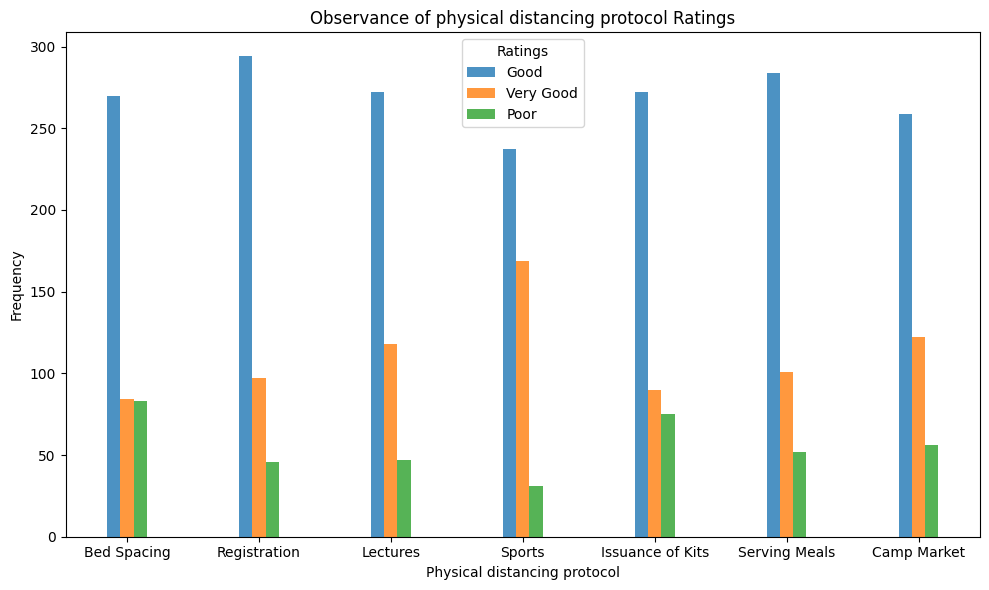

In [ ]:
categories = ['Good', 'Very Good', 'Poor']
columns_to_plot = ['38. How would you rate the observance of physical distancing protocol  [a. Bed Spacing]',
                   '38. How would you rate the observance of physical distancing protocol  [b. Registration]',
                   '38. How would you rate the observance of physical distancing protocol  [c. Lectures]',
                   '38. How would you rate the observance of physical distancing protocol  [d. Sports]',
                   '38. How would you rate the observance of physical distancing protocol  [e. Issuance of Kits]',
                   '38. How would you rate the observance of physical distancing protocol  [f. Serving Meals]',
                   '38. How would you rate the observance of physical distancing protocol  [g. Camp Market]']

# Create a DataFrame containing only the columns to plot
df_subset2 = df[columns_to_plot]


# Initialize an empty dictionary to store the counts for each category
category_counts = {cat: [] for cat in categories}

# Calculate the counts of each category in all categorical columns
for col in df_subset2.columns:
    counts = df_subset2[col].value_counts()
    for cat in categories:
        category_counts[cat].append(counts.get(cat, 0))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.1
x = np.arange(len(df_subset2.columns))
bar_positions = [x + bar_width * i for i in range(len(categories))]

for i, cat in enumerate(categories):
    ax.bar(bar_positions[i], category_counts[cat], label=cat, width=bar_width, alpha=0.8)

ax.set_xticks(x + (len(categories) - 1) * bar_width / 2)
ax.set_xticklabels(['Bed Spacing', 'Registration', 'Lectures', 'Sports', 'Issuance of Kits', 'Serving Meals', 'Camp Market'])
ax.set_xlabel('Physical distancing protocol')
ax.set_ylabel('Frequency')
ax.set_title('Observance of physical distancing protocol Ratings')
ax.legend(title='Ratings')
plt.tight_layout();

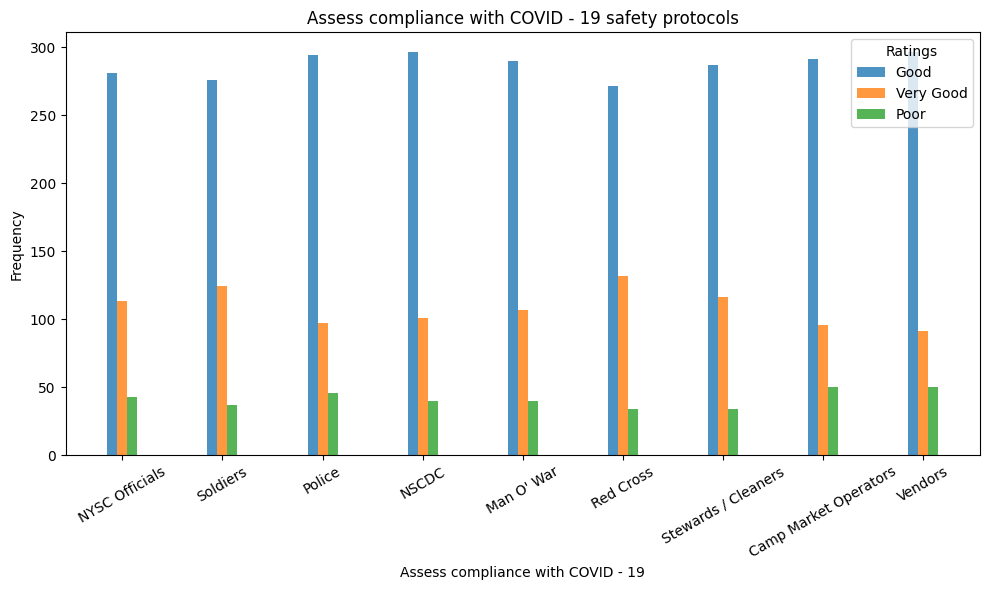

In [ ]:
categories = ['Good', 'Very Good', 'Poor']
columns_to_plot = ['39. Assess compliance with COVID - 19 safety protocols by the : [a. NYSC Officials]',
                   '39. Assess compliance with COVID - 19 safety protocols by the : [b. Soldiers]',
                   '39. Assess compliance with COVID - 19 safety protocols by the : [c. Police]',
                   '39. Assess compliance with COVID - 19 safety protocols by the : [d. NSCDC]',
                   "39. Assess compliance with COVID - 19 safety protocols by the : [e. Man O' War]",
                   '39. Assess compliance with COVID - 19 safety protocols by the : [f. Red Cross]',
                   '39. Assess compliance with COVID - 19 safety protocols by the : [g. Stewards / Cleaners]',
                   '39. Assess compliance with COVID - 19 safety protocols by the : [h. Camp Market Operators]',
                   '39. Assess compliance with COVID - 19 safety protocols by the : [i. Vendors]']

# Create a DataFrame containing only the columns to plot
df_subset3= df[columns_to_plot]


# Initialize an empty dictionary to store the counts for each category
category_counts = {cat: [] for cat in categories}

# Calculate the counts of each category in all categorical columns
for col in df_subset3.columns:
    counts = df_subset3[col].value_counts()
    for cat in categories:
        category_counts[cat].append(counts.get(cat, 0))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.1
x = np.arange(len(df_subset3.columns))
bar_positions = [x + bar_width * i for i in range(len(categories))]

for i, cat in enumerate(categories):
    ax.bar(bar_positions[i], category_counts[cat], label=cat, width=bar_width, alpha=0.8)

ax.set_xticks(x + (len(categories) - 1) * bar_width / 2)
plt.xticks(rotation = 30)
ax.set_xticklabels(['NYSC Officials', 'Soldiers', 'Police', 'NSCDC', "Man O' War", 'Red Cross', 'Stewards / Cleaners', 'Camp Market Operators', 'Vendors'])
ax.set_xlabel('Assess compliance with COVID - 19')
ax.set_ylabel('Frequency')
ax.set_title('Assess compliance with COVID - 19 safety protocols')
ax.legend(title='Ratings')
plt.tight_layout();

In [ ]:
df['47.  What aspect of the orientation course programme did you find most interesting?'].value_counts()[:30]

SAED                      46
Saed                      25
Parade                    14
Social activities          9
Skill acquisition          8
Saed training              7
Sport                      6
All                        6
Sports                     6
Sports                     5
Everything                 4
Parade                     4
Sport                      3
Sead                       3
The social activities      3
Social night               3
Saed                       3
Social night               3
SAED                       3
Marching                   2
The lectures               2
Socials                    2
Drill                      2
SAED Training              2
Matching                   2
Social Night               2
Morning exercise           2
SAED CLASS                 2
SAED training              2
SAED program               2
Name: 47.  What aspect of the orientation course programme did you find most interesting?, dtype: int64

In [ ]:
df['47.  What aspect of the orientation course programme did you find most interesting?'].value_counts()[:6]

SAED                  46
Saed                  25
Parade                14
Social activities      9
Skill acquisition      8
Saed training          7
Name: 47.  What aspect of the orientation course programme did you find most interesting?, dtype: int64

In [ ]:


# Define the mapping dictionary for standardization
mapping_dict = {
    'SAED': 'SAED',
    'SAED ': 'SAED',
    'Saed':'SAED',
    'Saed ':'SAED',
    'SAED CLASS':'SAED',
    'Saed training':'SAED',
    'Saed training ':'SAED',
    'SAED lecture':'SAED',
    'SAED training':'SAED',
    'SAED training':'SAED' ,
    'Skill acquisition':'SAED',
    'Skill acquisition ':'SAED',
    'Saed training':'SAED',
    'DRILLS':'Parade',
    'Parade ':'Parade',
    'Sead':'SAED',
    'Marching':'Parade',
    'Matching':'Parade',
    'Sport':'Sports',
    'Sport ':'Sports',
    'Sports ':'Sports',
    'Social night':'Social activities',
    'Social Night':'Social activities',
    'Social night ':'Social activities',
    'Social activities ':'Social activities',
    'The social activities':'Social activities',
    'The social activities ':'Social activities',
    'Everything': 'All'

}

df.replace({'47.  What aspect of the orientation course programme did you find most interesting?' : mapping_dict}, inplace=True)

In [ ]:
plot_top(6, '47.  What aspect of the orientation course programme did you find most interesting?', 'Interesting aspect of the Orientation Camp')

In [ ]:
unique_input = list(df['48. What suggestions would you give for improving the orientation course programme?'].unique())

In [ ]:
def plot_top(N, var, x_lab):
  # Get the top N categories based on their count in the dataframe\
  top_n_categories = df[var].value_counts().head(N).index.tolist()

  # Filter the dataframe to include only the top N categories
  top_n_df = df[df[var].isin(top_n_categories)]

  category_counts = top_n_df[var].value_counts()
  sorted_categories = category_counts.sort_values(ascending=False).index.tolist()

  # Plot the bar chart using Plotly Express
  fig = px.bar(top_n_df, x=var,  title=f'Top {N} {x_lab}',
               labels={var: x_lab, 'y':'Frequency'}, category_orders={var: sorted_categories})

  fig.update_yaxes(title_text='Frequency', tickfont=dict(size=12))
  fig.show()

In [ ]:
plot_top(10, '12. Area of specialization\nPlease write your course of study in full. For instance: Medicine, Accounting, Elect - Elect Engineering, Philosophy, Zoology etc\n\n', 'Course of Study')

In [ ]:
N = 5

# Get the top N categories based on their count in the dataframe
top_n_categories = df['48. What suggestions would you give for improving the orientation course programme?'].value_counts().head(N).index.tolist()

# Filter the dataframe to include only the top N categories
top_n_df = df[df['48. What suggestions would you give for improving the orientation course programme?'].isin(top_n_categories)]

# Plot the bar chart using Plotly Express
fig = px.bar(top_n_df, x='48. What suggestions would you give for improving the orientation course programme?', title=f'Top {N} Categories by Count')
fig.show()

In [ ]:
df['48. What suggestions would you give for improving the orientation course programme?'].unique()

array(['Punishments should be given according to the victim not generally ',
       'They should improve in the quality of food',
       'The food and also the toilets also',
       'The food and some proper conduction of the male hostel especially the water issues ',
       'Interesting daily activities',
       'Corp members should always participate in the orientation course for improvement',
       'Keep trying their best ',
       'More facilities for the corp member to learn better ',
       'Improve on discipline and water availability',
       'Better hostel, water and toilet, larger lecture halls with working fans and light, better food arrangement',
       'Provide adequate water when needed ',
       'Conducive environment for saed lectures ',
       'General overhauling of the system for optimum functioning and efficiency  ',
       'Continue the good work', 'More instructor on SAED',
       'Nysc should improve more on the quality of kits they give to Corp members',
      

In [ ]:
df['10. Institution of Graduation\nPlease write the name of your institution in full. No abbreviations.\nYour answer\n\n '].value_counts()[:10]

Ekiti State University                        20
Lagos State University                        17
University of Benin                           17
Federal University Oye-Ekiti                  16
Federal Polytechnic Ilaro                     11
Federal University of Agriculture Abeokuta     7
Kwara state polytechnic                        4
Obafemi Awolowo University                     3
FEDERAL POLYTECHNIC ADO EKITI                  3
Benue state polytechnic ugbokolo               3
Name: 10. Institution of Graduation\nPlease write the name of your institution in full. No abbreviations.\nYour answer\n\n , dtype: int64

In [ ]:
sch_dict = {'Ekiti state university ': 'Ekiti State University', 'Federal University Oye Ekiti': 'Federal University Oye-Ekiti',
            'Federal University Oye-Ekiti ': 'Federal University Oye-Ekiti', 'Federal university oye ekiti':'Federal University Oye-Ekiti',
            'Federal university Oye Ekiti':'Federal University Oye-Ekiti', 'Federal university Oye Ekiti ': 'Federal University Oye-Ekiti ',
            'Federal University Oye-Ekiti ': 'Federal University Oye-Ekiti',
            'Ekiti State University ': 'Ekiti State University', 'UNIVERSITY OF BENIN':'University of Benin', 'University of Benin ': 'University of Benin',
            'Federal University of Agriculture, Abeokuta ': 'Federal University of Agriculture Abeokuta', 'Federal University of Agriculture Abeokuta ': 'Federal University of Agriculture Abeokuta',
            'LAGOS STATE UNIVERSITY': 'Lagos State University', 'Lagos state university ':'Lagos State University', 'Lagos State University ': 'Lagos State University',
            'LAGOS STATE UNIVERSITY ': 'Lagos State University', 'Federal polytechnic ilaro': 'Federal Polytechnic Ilaro', 'Federal polytechnic ilaro ':'Federal Polytechnic Ilaro', 'The Federal Polytechnic Ilaro': 'Federal Polytechnic Ilaro'}

df.replace({'10. Institution of Graduation\nPlease write the name of your institution in full. No abbreviations.\nYour answer\n\n ' : sch_dict}, inplace=True)


In [ ]:
plot_top(10, '10. Institution of Graduation\nPlease write the name of your institution in full. No abbreviations.\nYour answer\n\n ', 'Institution of Graduation')

In [ ]:
df.columns[12]

'12. Area of specialization\nPlease write your course of study in full. For instance: Medicine, Accounting, Elect - Elect Engineering, Philosophy, Zoology etc\n\n'

In [ ]:
df['12. Area of specialization\nPlease write your course of study in full. For instance: Medicine, Accounting, Elect - Elect Engineering, Philosophy, Zoology etc\n\n'].value_counts()[:20]

Accounting                                 17
Microbiology                               13
Accounting                                 11
Mass communication                         11
Business administration                     9
Sociology                                   9
Biochemistry                                8
Business Administration                     8
Computer science                            6
Banking and finance                         5
Computer Science                            5
Mechanical engineering                      5
Mass Communication                          5
Public administration                       5
Business administration and management      5
Microbiology                                4
Industrial Chemistry                        4
History and international studies           4
Business administration and management      3
Mathematics                                 3
Name: 12. Area of specialization\nPlease write your course of study in full. For

In [ ]:
plot_top(10, '12. Area of specialization\nPlease write your course of study in full. For instance: Medicine, Accounting, Elect - Elect Engineering, Philosophy, Zoology etc\n\n', 'Course of Study')

In [ ]:
dict_area = {'Accounting ': 'Accounting',
             'Mass communication': 'Mass Communication',
             'Mass communication ': 'Mass Communication',
             'Business administration': 'Business Administration',
             'Business administration ': 'Business Administration',
             'Business Administration ': 'Business Administration',
             'Business administration and management ': 'Business Administration',
             'Computer science': 'Computer Science',
             'Computer science ': 'Computer Science',
             'Computer Science ': 'Computer Science',
             'Microbiology': 'Microbiology '
             }

df.replace({'12. Area of specialization\nPlease write your course of study in full. For instance: Medicine, Accounting, Elect - Elect Engineering, Philosophy, Zoology etc\n\n' : dict_area}, inplace=True)

In [ ]:
df['15. Are you on concessional deployment? If Yes, state reasons.'] = np.where(df['15. Are you on concessional deployment? If Yes, state reasons.'].isin(['No']), df['15. Are you on concessional deployment? If Yes, state reasons.'], 'Yes')

In [ ]:
df['15. Are you on concessional deployment? If Yes, state reasons.'].value_counts()

No     224
Yes    213
Name: 15. Are you on concessional deployment? If Yes, state reasons., dtype: int64

In [ ]:
counts = df['15. Are you on concessional deployment? If Yes, state reasons.'].value_counts()
percentages = round(df['15. Are you on concessional deployment? If Yes, state reasons.'].value_counts(normalize=True) * 100, 2)
summary_df = pd.DataFrame({'Categories': percentages.index, 'Percentages': percentages.values})
fig = px.pie(summary_df, names='Categories', values='Percentages',
labels={'Percentages': 'Percentage (%)'})
fig.show()